In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set_color_codes()

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
print('%s patients, %s features' % data.shape)
data.head()

324 patients, 35 features


,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,diagnosis method,keep side,cytology,duration of symptoms,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,1,0,1,24.0,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,1,0,0,1.0,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,0,1,0,1.0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,1,0,0,3.0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1,1.5,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [3]:
data.isnull().any()

age                                 False
gender                              False
city                                False
asbestos exposure                   False
type of MM                          False
duration of asbestos exposure       False
diagnosis method                    False
keep side                           False
cytology                            False
duration of symptoms                False
dyspnoea                            False
ache on chest                       False
weakness                            False
habit of cigarette                  False
performance status                  False
white blood                         False
cell count (WBC)                    False
hemoglobin (HGB)                    False
platelet count (PLT)                False
sedimentation                       False
blood lactic dehydrogenise (LDH)    False
alkaline phosphatise (ALP)          False
total protein                       False
albumin                           

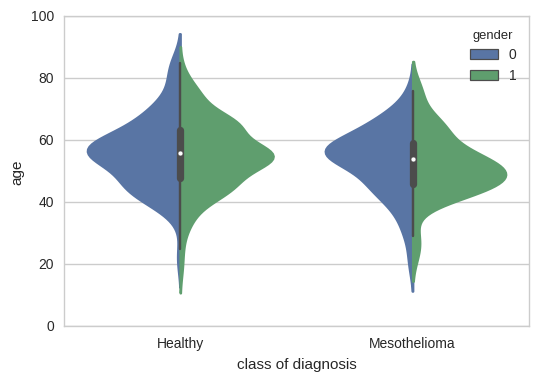

In [7]:
ax = sns.violinplot(x='class of diagnosis', y='age', hue='gender', data=data, split=True)
ax.set_xticklabels(['Healthy', 'Mesothelioma']);

In [5]:
for label, (_, table) in zip(['Healthy', 'Mesothelioma'], data.groupby('class of diagnosis')):
    
    percent, mm_type = np.histogram(table['type of MM'], bins=range(4), normed=True)
    
    histogram = ';'.join(('  MM type %s: %.2f%%' % (t, p)) for t, p in zip(mm_type, (percent*100)))
    
    print(label, 'patients:', histogram)

Healthy patients:   MM type 0: 97.37%;  MM type 1: 2.63%;  MM type 2: 0.00%
Mesothelioma patients:   MM type 0: 91.67%;  MM type 1: 5.21%;  MM type 2: 3.12%
